## What is this project about?
So we'll try to write an algorithm that will predict the health of an engine based on provided data

The dataset has has been taken from Kaggle dataset repositories

We'll start by:
1: Data exploring and cleaning / data preprocessing
2: Feature Engineering and selection
3: Model selectio and training
4: Model evaluation
5: Hyperparameter tuning 
6: Finally Deployment 

## Importing the statements 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('engine_data.csv')

# 1: DATA EXPLORATION AND CLEANING 

### Preliminary data exploration 
* What is the shape of `dataset`? 
* How many rows and columns?
* What are the column names?
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values? 

In [4]:
dataset.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [5]:
dataset.shape

(19535, 7)

In [6]:
dataset.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [7]:
dataset.duplicated().value_counts()

False    19535
Name: count, dtype: int64

In [8]:
dataset.isna().value_counts()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  lub oil temp  Coolant temp  Engine Condition
False       False             False          False             False         False         False               19535
Name: count, dtype: int64

No missing values nor duplicated values in the dataset 

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


## Data visualization

In [10]:
import seaborn as sns 

/Users/jennymorisho/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


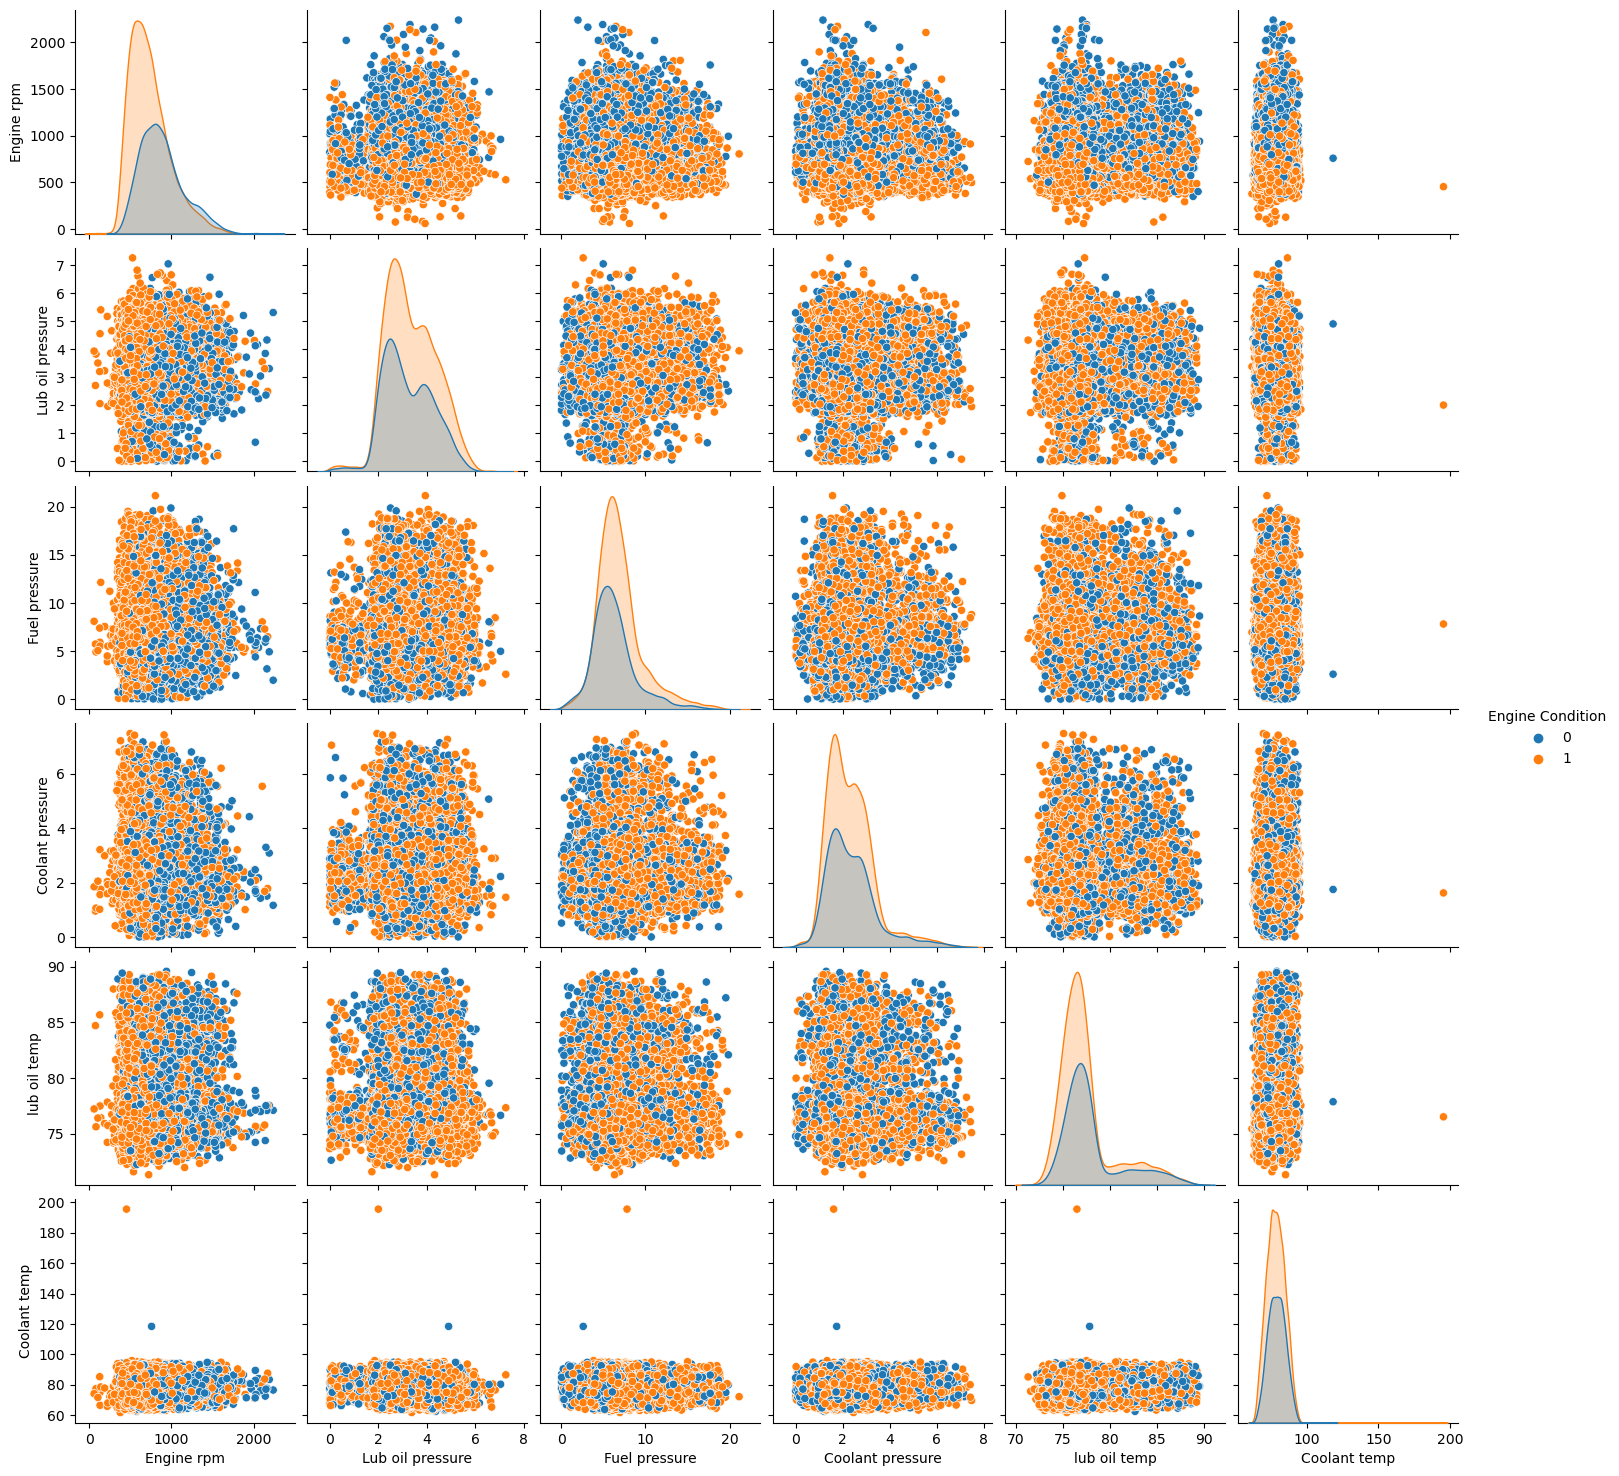

In [12]:
sns.pairplot(data=dataset, vars=['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
                                 'lub oil temp', 'Coolant temp', ], hue='Engine Condition')
plt.show()

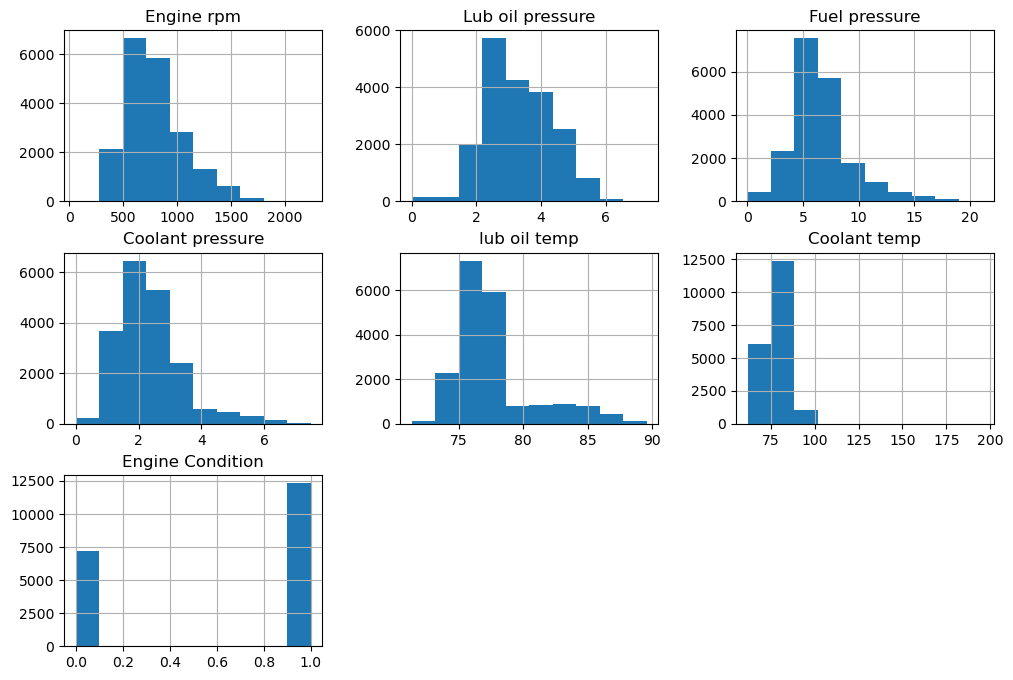

In [14]:
dataset.hist(figsize=(12, 8))
plt.show()


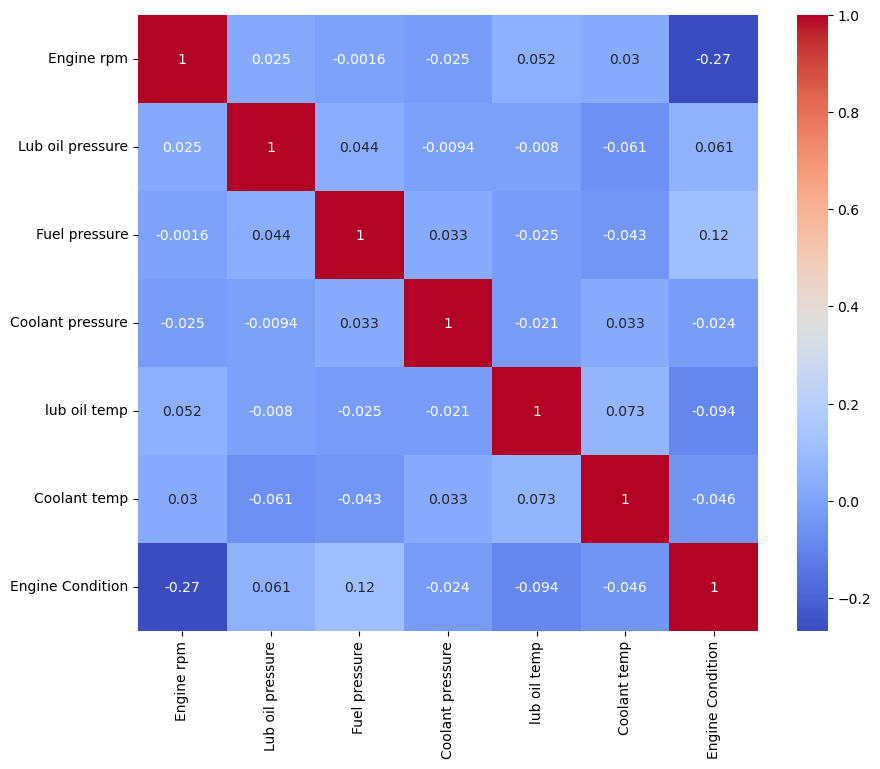

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()


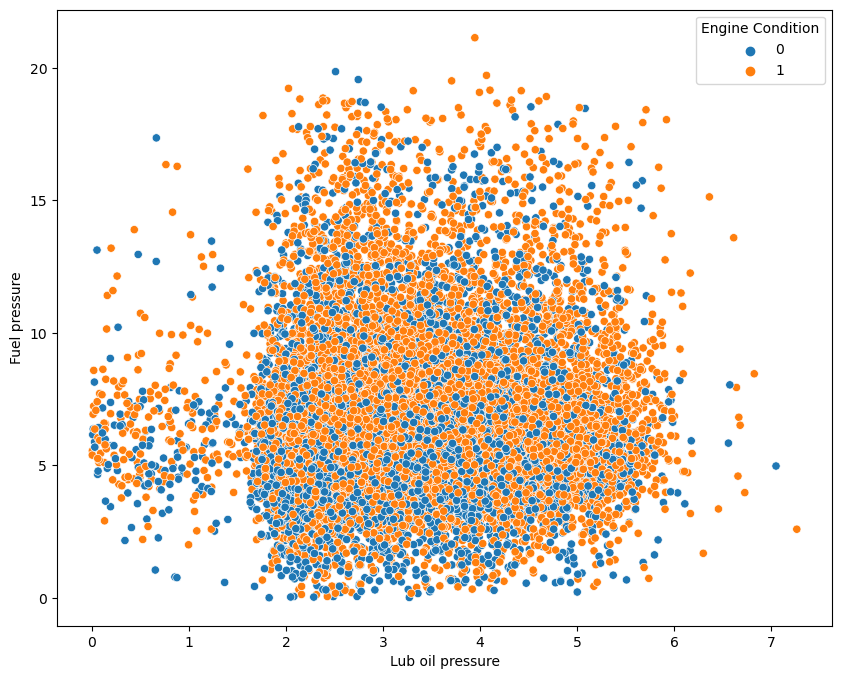

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Lub oil pressure', y='Fuel pressure', hue='Engine Condition', data=dataset)
plt.show()


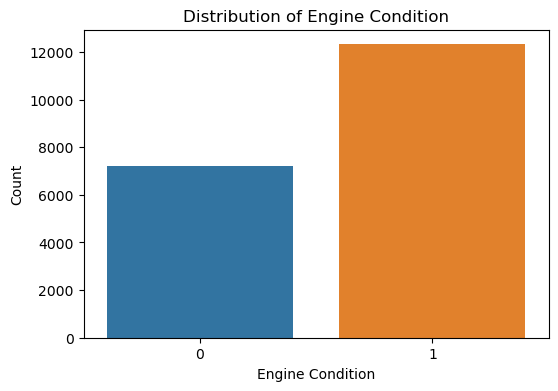

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Engine Condition', data=dataset)
plt.xlabel('Engine Condition')
plt.ylabel('Count')
plt.title('Distribution of Engine Condition')
plt.show()